# Warping Images

In Menpo, we provide an easy way to warp images that utilizes our set of Transform classes. If you want an overview of what Transforms we have in Menpo, go take a look at the Transforms notebooks.

Warping in Menpo follows a simple set of rules. The idea is that, given an image, we wish to warp it into some sort of reference frame. This is most obviously illustrated by the example of warping a sample face in to the reference space of a deformable model. However, we need some way of approximating the placement of pixels from the input image to the reference space. This is where Transforms are used. The Transform defines how we map from input space to reference space.

To make everything more clear, lets take a look at some examples.

In [1]:
# Import the IO module
import menpo.io as mio
# Import Matplotlib so we can plot subplots
import matplotlib.pyplot as plt

In [2]:
# Import a couple of interesting images that are landmarked!
takeo = mio.import_builtin_asset('takeo.ppm')
takeo = takeo.as_masked()
lenna = mio.import_builtin_asset('lenna.png')
lenna = lenna.as_masked()

Now, given a landmarked image, it is simple to create a reference template by constraining the images mask to lie within the boundary of the landmarks. For example:

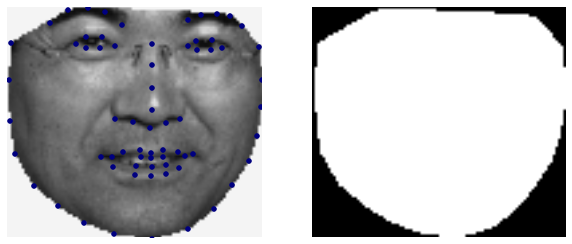

In [3]:
%matplotlib inline
takeo = takeo.crop_to_landmarks()
takeo.constrain_mask_to_landmarks()

plt.subplot(121)
takeo.view_landmarks();
plt.subplot(122)
takeo.mask.view();

Different landmark sets will obviously produce different shaped masks!

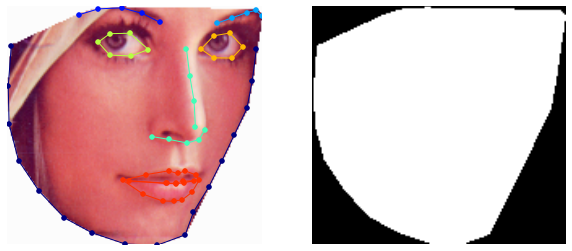

In [4]:
%matplotlib inline
lenna = lenna.crop_to_landmarks()
lenna.constrain_mask_to_landmarks()

plt.subplot(121)
lenna.view_landmarks();
plt.subplot(122)
lenna.mask.view();

## Commonly used parametric warps: Piecewise Affine and Thin Plate Splines
Commonly, in deformable modelling and parametric image alignment, we want to be able to approximate non-rigid movement within our objects. In faces, this non-rigid movement can come from changes in pose and expression. Two commonly used transforms that enable this kind of movement are Piecewise Affine (PWA) and Thin Plate Splines (TPS). Please go check over the Notebooks for these Transforms if you haven't already!

Both PWA and TPS are defined between a set of source and target landmarks. Luckily, it is easy to define these classes given the landmarks on our images. Let's see what this looks like:

In [5]:
from menpo.transform import ThinPlateSplines, PiecewiseAffine

tps_lenna_to_takeo = ThinPlateSplines(lenna.landmarks['LJSON'].lms, takeo.landmarks['PTS'].lms)
pwa_lenna_to_takeo = PiecewiseAffine(lenna.landmarks['LJSON'].lms, takeo.landmarks['PTS'].lms)

tps_takeo_to_lenna = ThinPlateSplines(takeo.landmarks['PTS'].lms, lenna.landmarks['LJSON'].lms)
pwa_takeo_to_lenna = PiecewiseAffine(takeo.landmarks['PTS'].lms, lenna.landmarks['LJSON'].lms)

We can then see what it would look like if we warped Takeo's face into the space of Lenna's! Notice that the output image has the same shape as the mask of Lenna. This is because Lenna is defining the reference frame. Also notice that you achieve different results depending on what Transform was used! PWA is a local discrete approximation, whilst TPS is global. Therefore, you are likely to get quit different results in extreme cases!

### NOTE: The results might look pretty odd in case the two shapes are in totally different poses. Warping frontal images produces much more visually appealing results.

In [6]:
warped_takeo_to_lenna_pwa = takeo.as_unmasked(copy=False).warp_to_mask(lenna.mask, pwa_lenna_to_takeo)
warped_takeo_to_lenna_tps = takeo.as_unmasked(copy=False).warp_to_mask(lenna.mask, tps_lenna_to_takeo)

The parameters to the warp function are very simple:

  - The `BooleanImage` mask that represents the output frame
  - The `Transform` to apply that will dictate how pixel positions in the original coordinate system are mapped in to the reference frame.

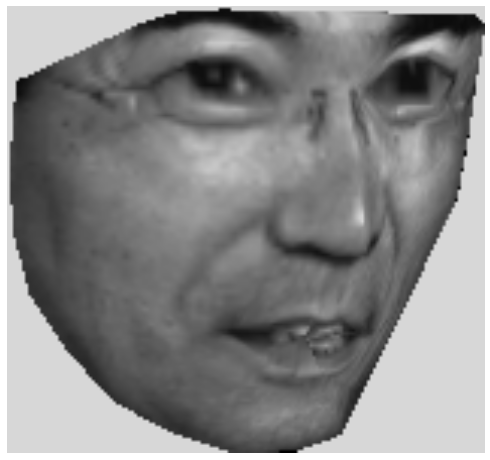

In [7]:
%matplotlib inline
# Takeo to Lenna with PWA
warped_takeo_to_lenna_pwa.view();

In [8]:
import numpy as np
np.nanmax(warped_takeo_to_lenna_pwa.pixels) + 1

1.8365217563764726

In [9]:
warped_takeo_to_lenna_pwa.pixels[0,1,1]

0.0

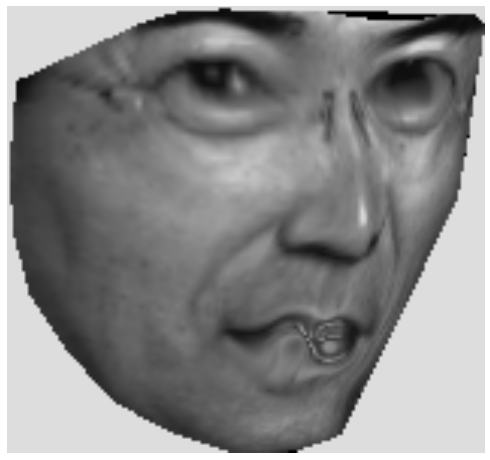

In [10]:
%matplotlib inline
# Takeo to Lenna with TPS
warped_takeo_to_lenna_tps.view();

Naturally, we can also perform the warp in the opposite direction!

In [11]:
warped_lenna_to_takeo_pwa = lenna.as_unmasked(copy=False).warp_to_mask(takeo.mask, pwa_takeo_to_lenna)
warped_lenna_to_takeo_tps = lenna.as_unmasked(copy=False).warp_to_mask(takeo.mask, pwa_takeo_to_lenna)

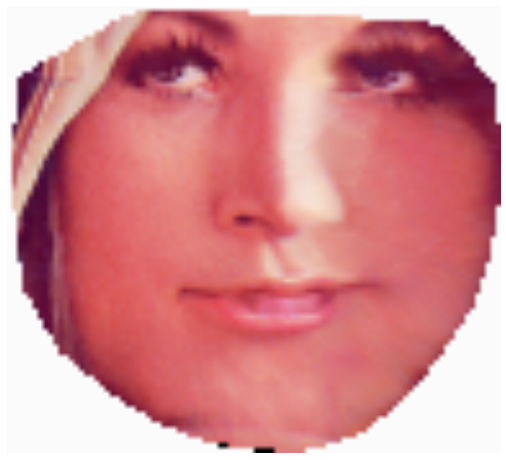

In [12]:
%matplotlib inline
# Lenna to Takeo with PWA
warped_lenna_to_takeo_pwa.view();

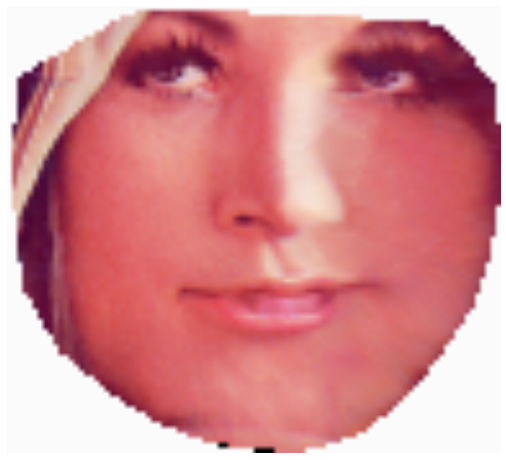

In [13]:
%matplotlib inline
# Lenna to Takeo with TPS
warped_lenna_to_takeo_tps.view();